In [1]:
import numpy as np
from numpy import linalg as LA
import math
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from urdf_parser_py.urdf import URDF
from pykdl_utils.kdl_parser import kdl_tree_from_urdf_model
from pykdl_utils.kdl_kinematics import KDLKinematics

f = open('/home/sai_kumar/iiwa7_setup/src/iiwa7_with_tool/urdf/iiwa7_with_tool.urdf', 'r')
robot = URDF.from_xml_string(f.read())  # parsed URDF
ur_kin = KDLKinematics(robot, "iiwa_link_0", "tcp")
ee_kin = KDLKinematics(robot, "iiwa_link_0", "iiwa_link_ee")
p_trocar = np.array([[ 9.10937772e-01],[-1.31414659e-12],[ 6.54741958e-01]])

Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_0']/collision[1]
Unknown tag "self_collision_checking" in /robot[@name='iiwa7']/link[@name='iiwa_link_0']
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_1']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_2']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_3']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_4']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_5']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_6']/collision[1]
Unknown tag "material" in /robot[@name='iiwa7']/link[@name='iiwa_link_7']/collision[1]
Unknown tag "hardwareInterface" in /robot[@name='iiwa7']/transmission[@name='iiwa_tran_1']/actuator[@name='iiwa_motor_1']
Unknown tag "robotNamespace" in /robot[@name='iiwa7']/transmission[@name='iiwa_tran_1']
Unkno

[[-0.0428213, 1.03674, 0.68401, 1.91514, -0.199268, -0.554173, 5.7179e-05], [-0.0359493, 1.02503, 0.666532, 1.85076, -0.207558, -0.587078, 5.54667e-05], [-0.0290772, 1.01332, 0.649053, 1.78638, -0.215848, -0.619983, 5.37543e-05], [-0.0222052, 1.00161, 0.631575, 1.722, -0.224137, -0.652888, 5.2042e-05], [-0.0153332, 0.9899, 0.614097, 1.65763, -0.232427, -0.685793, 5.03297e-05], [-0.00846117, 0.978191, 0.596619, 1.59325, -0.240717, -0.718699, 4.86174e-05], [-0.00158915, 0.966481, 0.57914, 1.52887, -0.249007, -0.751604, 4.6905e-05], [0.00528288, 0.954771, 0.561662, 1.46449, -0.257297, -0.784509, 4.51927e-05], [0.0121549, 0.943061, 0.544184, 1.40011, -0.265586, -0.817414, 4.34804e-05], [0.0190269, 0.931351, 0.526705, 1.33573, -0.273876, -0.850319, 4.1768e-05], [0.025899, 0.919641, 0.509227, 1.27136, -0.282166, -0.883224, 4.00557e-05], [0.032771, 0.907931, 0.491749, 1.20698, -0.290456, -0.916129, 3.83434e-05], [0.039643, 0.896221, 0.474271, 1.1426, -0.298746, -0.949034, 3.6631e-05], [0.0465

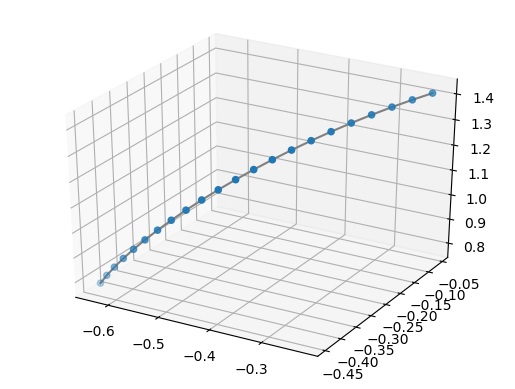

In [20]:
p = open('path.txt', 'r')
a = []
for line in p.readlines():
    n = []
    line = line.rstrip()
    for i in line.split(" "):
        n.append(float(i))

    a.append(n)
print(a)

ee_list  = []
for i in a:
    e = ur_kin.forward(i)[:3, 3]
    ee_list.append([e[0,0], e[1,0], e[2,0]])

print(ee_list)

fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = []
y_data = []
z_data = []
for i in ee_list:
    x_data.append(i[0])
    y_data.append(i[1])
    z_data.append(i[2])
ax.plot3D(x_data,y_data,z_data, 'gray')
ax.scatter3D(x_data,y_data,z_data, 'red')

plt.show()



[[5.8251027666100796e-05, -0.00020413408889199622, -2.044462947159431e-06], [-0.00018542857157466397, 0.0008295728660274482, 0.0005012875973995357], [-0.0003363941887837285, 0.001599515890540113, 0.000963687615959552], [-0.000398127195550102, 0.002136852572769219, 0.0013963045864746615], [-0.0003744857868053231, 0.002468283862738705, 0.0018100517114463255], [-0.0002760730542311629, 0.002627556666142703, 0.0022003832855288508], [-0.0001111665374564641, 0.0026409422480378787, 0.0025726367541234474], [0.00010892423352293346, 0.002534743271893878, 0.0029243313016984462], [0.0003712673085833895, 0.002333975757877558, 0.00325056239297572], [0.0006615540680197096, 0.002060369797434101, 0.003542901891593786], [0.0009656836992311124, 0.0017342229821614462, 0.003795647891250864], [0.0012626920256674223, 0.0013779069816925204, 0.003988207751954298], [0.0015361475250041945, 0.0010065830543246367, 0.004110586579841535], [0.0017667145075269675, 0.0006348816712321881, 0.00414701077277535], [0.0019325

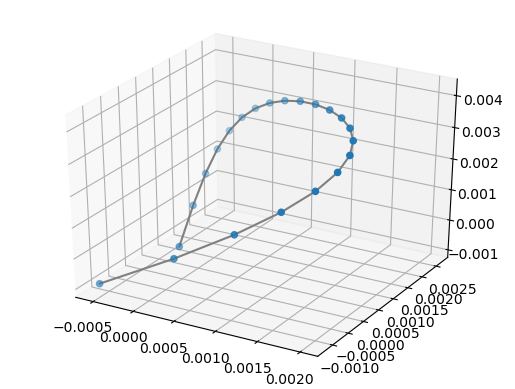

In [28]:
def constraintfunction(q = ur_kin.random_joint_angles()):
    
    out = np.zeros((3,1), dtype=np.float64)
    
    
    p_i = ur_kin.forward(q)[:3, 3]
    p_t = ee_kin.forward(q)[:3, 3]

    AP = p_trocar - p_i
    
    d = p_t - p_i
    

    # dist = LA.norm(np.cross(np.transpose(AP), np.transpose(d)))/LA.norm(d)
    lam = np.dot(np.transpose(AP), d)[0,0]/LA.norm(d)**2
    p_rcm = p_i + lam*(p_t - p_i)

    out[0] = (p_rcm - p_trocar)[0,:]
    out[1] = (p_rcm - p_trocar)[1,:]
    out[2] = (p_rcm - p_trocar)[2,:]

    
    return out

rcm_list  = []
for i in a:
    e = constraintfunction(i)
    rcm_list.append([e[0,0], e[1,0], e[2,0]])

print(rcm_list)

fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = []
y_data = []
z_data = []
for i in rcm_list:
    x_data.append(i[0])
    y_data.append(i[1])
    z_data.append(i[2])
ax.plot3D(x_data,y_data,z_data, 'gray')
ax.scatter3D(x_data,y_data,z_data, 'red')

r = 0.005
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
# ax.plot_wireframe(x, y, z, cmap=plt.cm.YlGnBu_r)

plt.show()

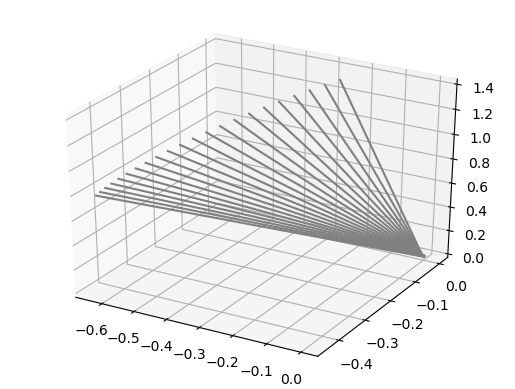

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(ee_list)):
    x_data = [ee_list[i][0], rcm_list[i][0]]
    y_data = [ee_list[i][1], rcm_list[i][1]]
    z_data = [ee_list[i][2], rcm_list[i][2]]
    ax.plot3D(x_data,y_data,z_data, 'gray')

plt.show()
    